In [40]:
import tensorflow as tf
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras import backend as K
from keras.callbacks import TensorBoard,EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
import time
import json
import matplotlib.pyplot as plt

In [41]:
# Mirar las GPU's disponibles
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6099054395035100035
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6671596257
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6379199615791633636
physical_device_desc: "device: 0, name: GeForce GTX 1080, pci bus id: 0000:02:00.0, compute capability: 6.1"
]


In [42]:
batch_size = 128
num_classes = 10
epochs = 50

filas,columnas= 28,28

(xt,yt), (xtest,ytest) = mnist.load_data()

xt = xt.reshape(xt.shape[0],filas,columnas,1)
xtest = xtest.reshape(xtest.shape[0],filas,columnas,1)

xt = xt.astype('float32')
xtest = xtest.astype('float32')

# Normalizamos los datos de entrada
xt = xt / 255
xtest = xtest / 255

yt = keras.utils.to_categorical(yt,num_classes)
ytest = keras.utils.to_categorical(ytest,num_classes)

In [43]:
modelo = Sequential()

In [44]:
modelo.add(Flatten(input_shape=(28,28,1))) # Llevar todas la dimensiones a una sola
modelo.add(Dense(68, activation='relu'))
modelo.add(Dropout(0.25)) # Capa de regularización, que las neuronas sean independientes. 25% de probabilidad de cancelación
modelo.add(Dense(20, activation='relu'))
modelo.add(Dropout(0.25)) # Capa de regularización, que las neuronas sean independientes 25% de probabilidad de cancelación
modelo.add(Dense(num_classes, activation='softmax'))

In [45]:
modelo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 68)                53380     
_________________________________________________________________
dropout_7 (Dropout)          (None, 68)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 20)                1380      
_________________________________________________________________
dropout_8 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                210       
Total params: 54,970
Trainable params: 54,970
Non-trainable params: 0
_________________________________________________________________


In [46]:
modelo.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
t_start = time.time()
history = modelo.fit(xt, yt, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(xtest,ytest))
time.time() - t_start

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.7532 - acc: 0.7617 - val_loss: 0.2444 - val_acc: 0.9301
Epoch 2/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.3850 - acc: 0.8858 - val_loss: 0.1911 - val_acc: 0.9417
Epoch 3/50
46080/60000 [======================>.......] - ETA: 0s - loss: 0.3204 - acc: 0.9066

In [36]:
puntuacion = modelo.evaluate(xtest, ytest, verbose=1)
puntuacion

10000/10000 [==============================] - 0s 35us/step


[0.11871913403056969, 0.9728]

In [37]:
with open('hist_Mnist.json', 'w') as file:
    json.dump(history.history, file)

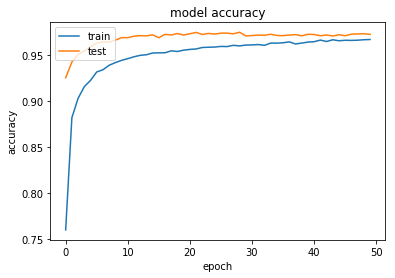

In [38]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

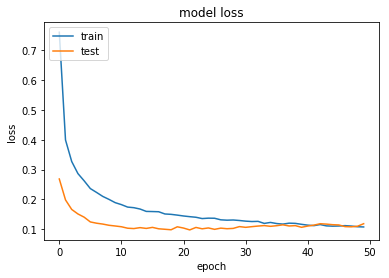

In [39]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])